In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys

sys.path.insert(0, '../src')
sys.path.insert(0, '../data')


import chocolate

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Read in dataset and sample it.
chocolate_data = pd.read_csv("../data/Chocolate_bar_ratings_2022.csv")
chocolate_data.sample(10)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
1491,1856,Malmo,Sweden,2016,Venezuela,Chuao,70%,"3- B,S,C","hammy, unrecognizable",3.00
213,1840,Batch,U.S.A.,2016,Dominican Republic,"Dominican Republic, Batch 3",65%,"3- B,S,C","creamy, sweet, fudgey",3.50
50,316,Ah Cacao,Mexico,2009,Mexico,Tabasco,70%,"3- B,S,C","gritty, spice, cocoa",3.00
694,2546,Dandelion,U.S.A.,2021,Brazil,"Vale Potumuju, 2019 h., batch 1",70%,"2- B,S",distinct choco and graham,4.00
1821,316,Original Hawaiin Chocolate Factory,U.S.A.,2009,U.S.A.,"Hawai'i Island, Kona Grand Cru E.",60%,"5- B,S,C,V,L","sticky, tobacco",3.00
496,2554,Castronovo,U.S.A.,2021,Peru,"Valle de Los Rios, batch 990",70%,"3- B,S,C","complex, strawberry, floral",4.00
247,508,Beschle (Felchlin),Switzerland,2010,Venezuela,"Carenero S., Barlovento, Grand Cru",70%,"3- B,S,C","creamy, macadamia, pepper",3.25
1342,1852,K'ul,U.S.A.,2016,Ecuador,"Los Rios, Hacienda Limon, Heirloom",70%,"4- B,S,C,L",oranges,3.75
1147,1327,Hacienda El Castillo,Ecuador,2014,Ecuador,Don Homero- Cerecita Valley,70%,"4- B,S,C,L","chewy, fatty, sweet, nutty",3.00
1280,2104,Johnny Iuzzini,U.S.A.,2018,Trinidad,"Tabaquite, batch 12",80%,"4- B,S,C,L","bold, spice, sour fruit, gritty",3.25


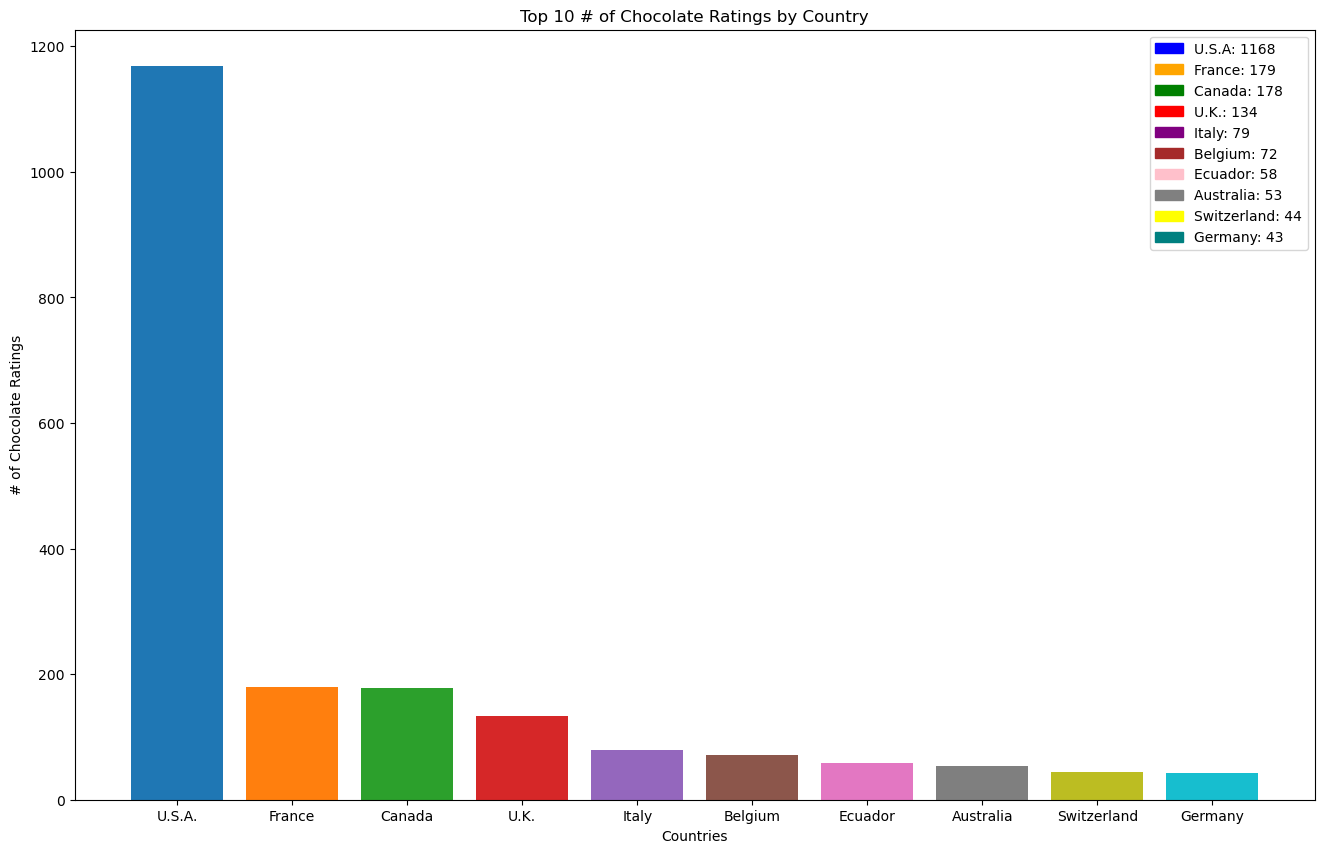

In [10]:
# Grab the top ten countires containing the most chocolate ratings after counting values by company location and sorting the counts in descending order.
def top_ten_count_chocolate_ratings(choco_df):
     company_location = choco_df["Company Location"].value_counts().sort_values(ascending=False)
     top_ten_countries = company_location[0:10]

     fig, ax = plt.subplots()
     
     c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
     '#bcbd22', '#17becf']
     ax.bar(top_ten_countries.index, top_ten_countries.values, color = c)
     ax.set_title("Top 10 # of Chocolate Ratings by Country")
     ax.set_ylabel("# of Chocolate Ratings")
     ax.set_xlabel("Countries")
     united_states_legend = mpatches.Patch(color= 'blue', label='U.S.A: 1168')
     france_legend = mpatches.Patch(color= 'orange', label='France: 179')
     canada_legend = mpatches.Patch(color= 'green', label='Canada: 178')
     uk_legend = mpatches.Patch(color= 'red', label='U.K.: 134')
     italy_legend = mpatches.Patch(color= 'purple', label='Italy: 79')
     belguim_legend = mpatches.Patch(color= 'brown', label='Belgium: 72')
     ecuador_legend = mpatches.Patch(color= 'pink', label='Ecuador: 58')
     australia_legend = mpatches.Patch(color= 'grey', label='Australia: 53')
     switzerland_legend = mpatches.Patch(color= 'yellow', label='Switzerland: 44')
     germany_legend = mpatches.Patch(color= 'teal', label='Germany: 43')
     plt.legend(handles=[united_states_legend, france_legend, canada_legend, uk_legend, italy_legend, belguim_legend, ecuador_legend, australia_legend, switzerland_legend, germany_legend])
     fig.set_size_inches(16, 10)
     return top_ten_countries
top_ten_chocolate_by_country = top_ten_count_chocolate_ratings(chocolate_data)



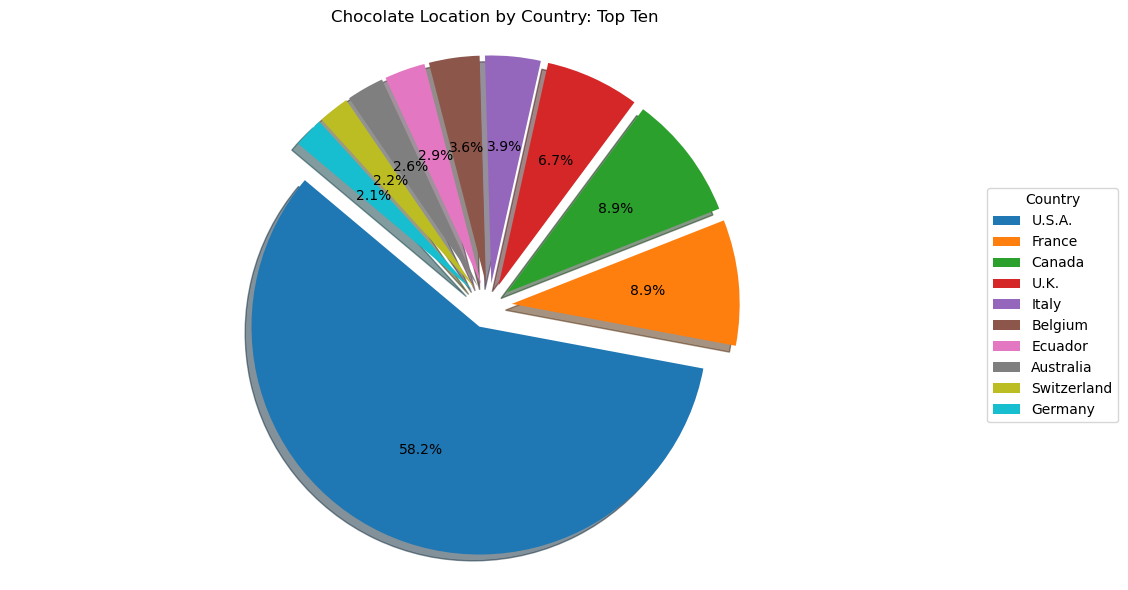

In [56]:
# Plot a % breakdown of the top ten countires containing the most chocolate ratings.
def top_ten_count_chocolate_ratings_percent(choco_df):
     company_location = choco_df["Company Location"].value_counts().sort_values(ascending=False)
     top_ten_countries = company_location[0:10]

     fig, ax = plt.subplots(figsize = (10,6))

     sizes = top_ten_countries.values
     labels = top_ten_countries.index.tolist()
     explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
     c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
     '#bcbd22', '#17becf']
     plt.pie(sizes, explode=explode, colors=c, 
        autopct='%1.1f%%', shadow=True, startangle=140)
     ax.legend( labels, title="Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
     ax.set_title("Chocolate Location by Country: Top Ten")
     plt.tight_layout()
     plt.axis('equal')
     plt.show()
     return top_ten_countries
top_ten_chocolate_by_country_percentage = top_ten_count_chocolate_ratings_percent(chocolate_data)

In [134]:
# Look at potential spearman and pearson correlations regarding cocoa percentage and rating.
def cocoa_correlations(choco_df):
    choco_df['Remove Cocoa Percentage'] = choco_df['Cocoa Percent'].astype(str).str.replace('%', '')
    choco_df['Cocoa Percentage as Float'] = choco_df['Remove Cocoa Percentage'].astype('float') / 100.0
    correlation_spearman = choco_df['Cocoa Percentage as Float'].corr(choco_df['Rating'], method ='spearman')
    correlation_pearson = choco_df['Cocoa Percentage as Float'].corr(choco_df['Rating'], method ='pearson')
    correlation_dict = {"Cocoa Percentage & Rating Correlation: Spearman":correlation_pearson, "Cocoa Percentage & Rating Correlation: Pearson":correlation_spearman}
    return correlation_dict
cocoa_and_rating_correlation = cocoa_correlations(chocolate_data)


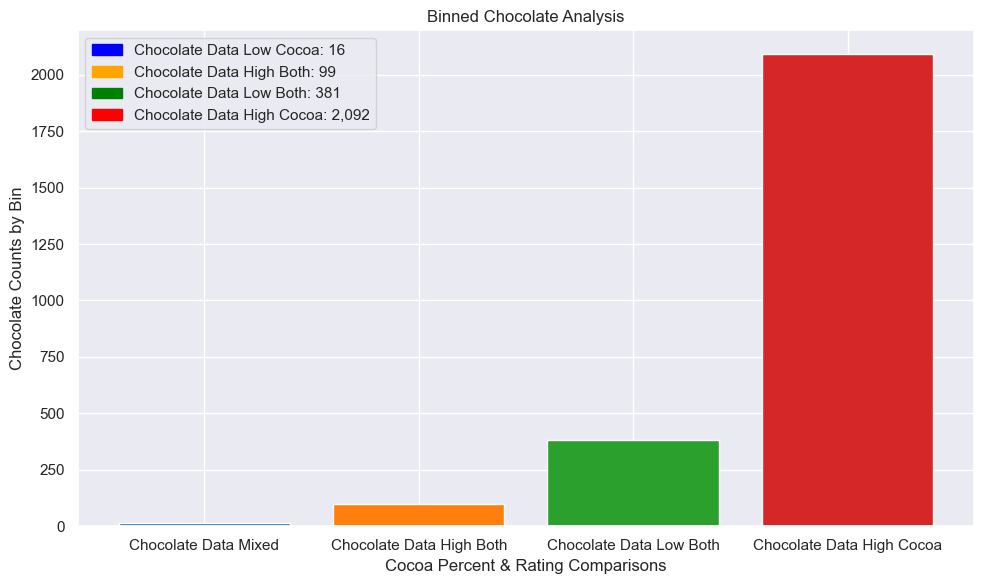

In [301]:
# Bin data into 4 groups based on cocoa percent and rating.
def cocoa_percent_and_rating(choco_df):
    choco_df['Remove Cocoa Percentage'] = choco_df['Cocoa Percent'].astype(str).str.replace('%', '')
    choco_df['Cocoa Percentage as Float'] = choco_df['Remove Cocoa Percentage'].astype('float') / 100.0
    chocolate_data_high_both = choco_df[(choco_df['Cocoa Percentage as Float'] >= 0.70) & (choco_df['Rating'] >= 4.00)].shape[0]
    chocolate_data_high_cocoa = choco_df[(choco_df['Cocoa Percentage as Float'] >= 0.70) & (choco_df['Rating'] < 4.00)].shape[0]
    chocolate_data_mixed = choco_df[(choco_df['Cocoa Percentage as Float'] < 0.70) & (choco_df['Rating'] >= 4.00)].shape[0]
    chocolate_data_low_both = choco_df[(choco_df['Cocoa Percentage as Float'] < 0.70) & (choco_df['Rating'] < 4.00)].shape[0]
    chocolate_bins = {"Chocolate Data High Both":chocolate_data_high_both, "Chocolate Data High Cocoa":chocolate_data_high_cocoa,"Chocolate Data Mixed":chocolate_data_mixed, "Chocolate Data Low Both":chocolate_data_low_both}

    # Bar plot of data.
    fig, ax = plt.subplots(figsize = (10,6))
    c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    cocoa_and_rating_comparison_sorted = dict(sorted(chocolate_bins.items(), key=lambda item: item[1]))
    cocoa_bins = list(cocoa_and_rating_comparison_sorted.keys())
    cocoa_bin_counts = list(cocoa_and_rating_comparison_sorted.values())

    plt.bar(range(len(cocoa_and_rating_comparison_sorted)), cocoa_bin_counts, tick_label=cocoa_bins, align = 'center', color = c)

    ax.set_title("Binned Chocolate Analysis")
    ax.set_ylabel("Chocolate Counts by Bin")
    ax.set_xlabel("Cocoa Percent & Rating Comparisons")
    chocolate_data_mixed_legend = mpatches.Patch(color= 'blue', label='Chocolate Data Low Cocoa: 16')
    chocolate_data_high_both_legend = mpatches.Patch(color= 'orange', label='Chocolate Data High Both: 99')
    chocolate_data_low_both_legend = mpatches.Patch(color= 'green', label='Chocolate Data Low Both: 381')
    chocolate_data_high_cocoa_legend = mpatches.Patch(color= 'red', label='Chocolate Data High Cocoa: 2,092')
    plt.legend(handles=[chocolate_data_mixed_legend, chocolate_data_high_both_legend, chocolate_data_low_both_legend,chocolate_data_high_cocoa_legend])
    fig.tight_layout()
    

cocoa_and_rating_comparison = cocoa_percent_and_rating(chocolate_data)




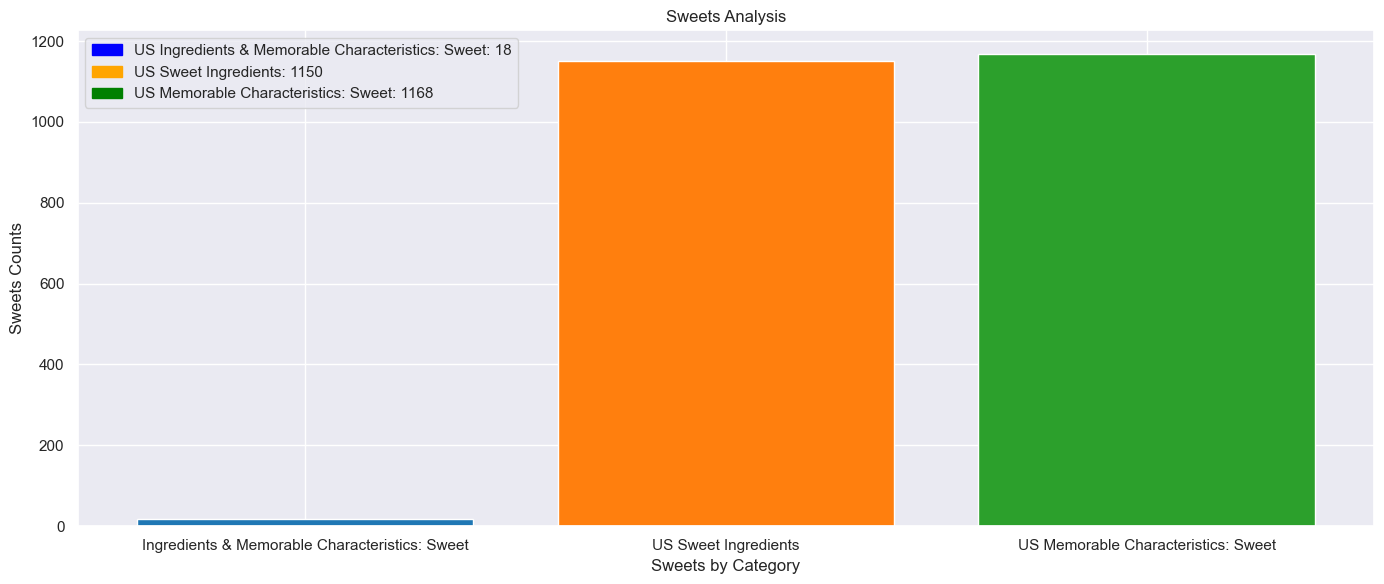

In [311]:
# Find sweet listed in ingredients and memorable characteristics, then compare counts of individual catergories and overlap.
def sweets_comparison(choco_df):
    united_states_chocolate = choco_df[choco_df["Company Location"] == "U.S.A."]
    us_sweet_ingredients = united_states_chocolate['Ingredients'].str.contains('S|S*').count()
    us_memorable_characteristics_sweet = united_states_chocolate['Most Memorable Characteristics'].str.contains('sweet').count()
    totally_sweet_dude = us_memorable_characteristics_sweet - us_sweet_ingredients
    sweets_data = {"US Sweet Ingredients":us_sweet_ingredients, "US Memorable Characteristics: Sweet":us_memorable_characteristics_sweet, "Ingredients & Memorable Characteristics: Sweet": totally_sweet_dude}

    # Horizontal bar plot of data.
    fig, ax = plt.subplots(figsize = (14,6))
        
    c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    sweets_data_sorted = dict(sorted(sweets_data.items(), key=lambda item: item[1]))
    sweets_categories = list(sweets_data_sorted.keys())
    sweets_categories_count = list(sweets_data_sorted.values())

    plt.bar(range(len(sweets_data_sorted)), sweets_categories_count, tick_label=sweets_categories, align = 'center', color = c)

    ax.set_title("Sweets Analysis")
    ax.set_ylabel("Sweets Counts")
    ax.set_xlabel("Sweets by Category")
    totally_sweet_dude_legend = mpatches.Patch(color= 'blue', label='US Ingredients & Memorable Characteristics: Sweet: 18')
    us_sweets_ingredient_legend = mpatches.Patch(color= 'orange', label='US Sweet Ingredients: 1150')
    us_memorable_characteristics_legend = mpatches.Patch(color= 'green', label='US Memorable Characteristics: Sweet: 1168')
    plt.legend(handles=[totally_sweet_dude_legend, us_sweets_ingredient_legend, us_memorable_characteristics_legend])
    fig.tight_layout()

sweets_overlap = sweets_comparison(chocolate_data)


In [137]:
##IGNORE - attempts at correlation between sweet in ingredients + memorable characteristics & Cocoa Percent.
united_states_chocolate = chocolate_data[chocolate_data["Company Location"] == "U.S.A."]
us_sweet_ingredients = united_states_chocolate['Ingredients'].str.contains('S|S*')
# united_states_chocolate['Ingredients'][us_sweet_ingredients]
# ingredients_correlation
# us_memorable_characteristics_sweet = united_states_chocolate['Most Memorable Characteristics'].str.contains('sweet')
# totally_sweet_dude = united_states_chocolate[(united_states_chocolate['Ingredients'].str.contains('S|S*')) & (united_states_chocolate['Most Memorable Characteristics'].str.contains('sweet'))]
s_corr = chocolate_data.Ingredients.str.get_dummies("S").corrwith(chocolate_data.Rating/chocolate_data.Rating.max())
s_corr

*         -0.059183
*,        -0.030924
*,C       -0.034816
*,C,      -0.017058
*,C,L     -0.020252
*,C,V     -0.023262
*,V,L     -0.008823
,C         0.147028
,C,       -0.004788
,C,L       0.012751
,C,L,     -0.008782
,C,V      -0.120644
,C,V,     -0.044152
,C,V,L    -0.067700
,C,V,L,   -0.023113
,L        -0.064067
,V        -0.002429
,V,L      -0.029562
1- B      -0.026057
2- B,      0.031884
2- B,C    -0.008782
3- B,      0.132800
4- B,     -0.073344
5- B,     -0.068200
5-B,      -0.044152
6-B,      -0.023113
a         -0.046464
dtype: float64

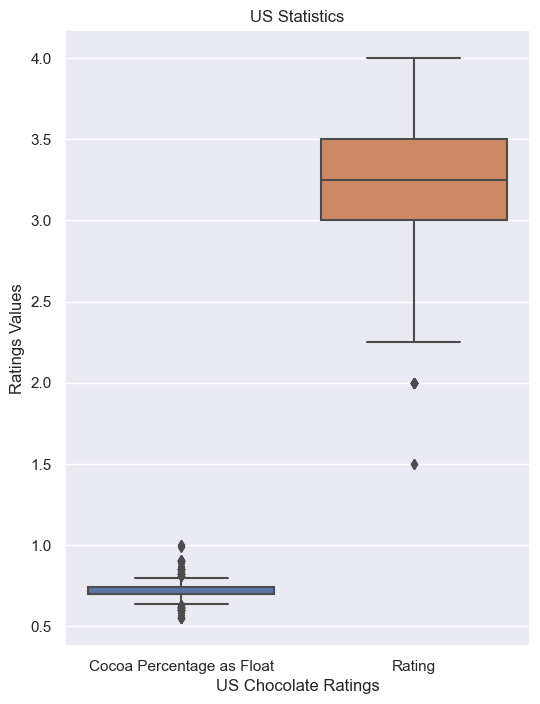

In [300]:
# Box plot of cocoa percent and rating for all United States company locations.
def us_chocolate_stats(choco_df):
    choco_df['Remove Cocoa Percentage'] = choco_df['Cocoa Percent'].astype(str).str.replace('%', '')
    choco_df['Cocoa Percentage as Float'] = choco_df['Remove Cocoa Percentage'].astype('float') / 100.0
    united_states_chocolate = choco_df[choco_df["Company Location"] == "U.S.A."]
    us_ratings_and_cocoa_percent = united_states_chocolate.loc[:, ['Cocoa Percentage as Float', 'Rating']].assign(Location="U.S.")

    sns.boxplot(data=us_ratings_and_cocoa_percent)
    sns.set(rc={"figure.figsize":(6, 8)})
    plt.title('US Statistics')
    plt.xlabel('US Chocolate Ratings')
    plt.ylabel('Ratings Values')
us_chocolate_statistics = us_chocolate_stats(chocolate_data)



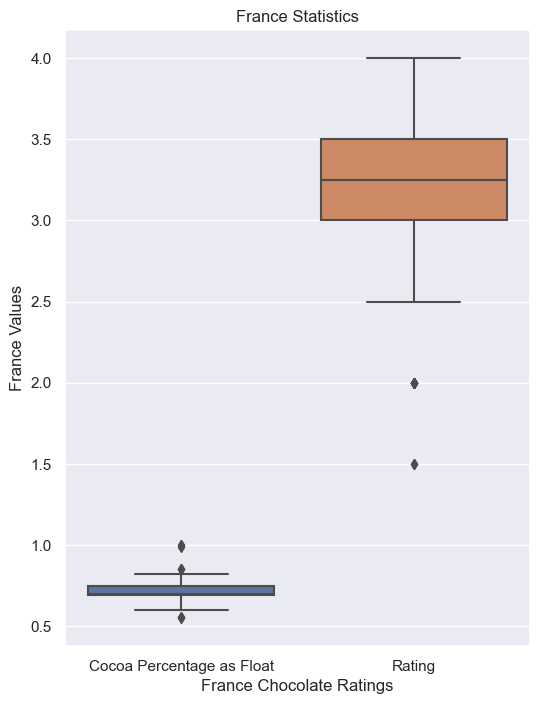

In [299]:
# Box plot of cocoa percent and rating for all France company locations.
def france_chocolate_stats(choco_df):
    choco_df['Remove Cocoa Percentage'] = choco_df['Cocoa Percent'].astype(str).str.replace('%', '')
    choco_df['Cocoa Percentage as Float'] = choco_df['Remove Cocoa Percentage'].astype('float') / 100.0
    france_chocolate = choco_df[choco_df["Company Location"] == "France"]
    france_ratings_and_cocoa_percent = france_chocolate.loc[:, ['Cocoa Percentage as Float', 'Rating']].assign(Location="France")

    sns.boxplot(data=france_ratings_and_cocoa_percent)
    sns.set(rc={"figure.figsize":(6, 8)})
    plt.title('France Statistics')
    plt.xlabel('France Chocolate Ratings')
    plt.ylabel('France Values')
france_chocolate_statistics = france_chocolate_stats(chocolate_data)

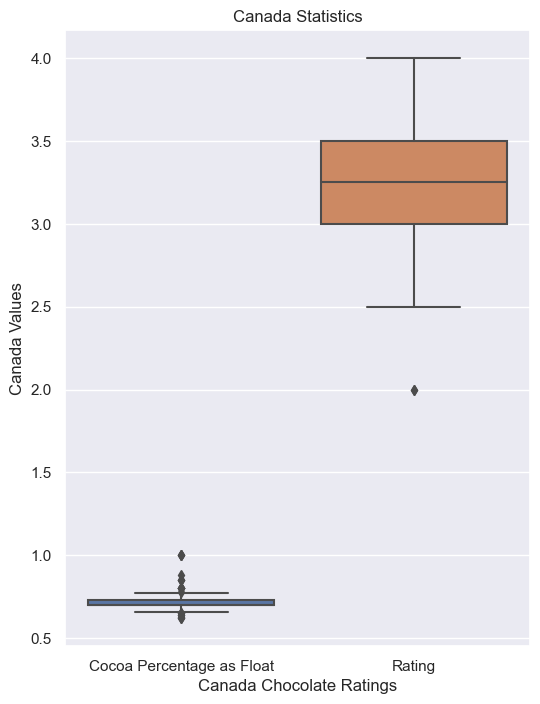

In [298]:
# Box plot of cocoa percent and rating for all Canada company locations.
def canada_chocolate_stats(choco_df):
    choco_df['Remove Cocoa Percentage'] = choco_df['Cocoa Percent'].astype(str).str.replace('%', '')
    choco_df['Cocoa Percentage as Float'] = choco_df['Remove Cocoa Percentage'].astype('float') / 100.0
    canada_chocolate = choco_df[choco_df["Company Location"] == "Canada"]
    canada_ratings_and_cocoa_percent = canada_chocolate.loc[:, ['Cocoa Percentage as Float', 'Rating']].assign(Location="Canada")

    sns.boxplot(data=canada_ratings_and_cocoa_percent)
    sns.set(rc={"figure.figsize":(6, 8)})
    plt.title('Canada Statistics')
    plt.xlabel('Canada Chocolate Ratings')
    plt.ylabel('Canada Values')
canada_chocolate_statistics = canada_chocolate_stats(chocolate_data)


In [ ]:
###IGNORE - Failed attempts of concatenating and melting multiple countries' cocoa percent and rating to have them all on one boxplot.


# choco_df['Remove Cocoa Percentage'] = choco_df['Cocoa Percent'].astype(str).str.replace('%', '')
# choco_df['Cocoa Percentage as Float'] = choco_df['Remove Cocoa Percentage'].astype('float') / 100.0

united_states_chocolate = chocolate_data[chocolate_data["Company Location"] == "U.S.A."]
us_ratings_and_cocoa_percent = united_states_chocolate.loc[:, ['Cocoa Percentage as Float', 'Rating']].assign(Location="U.S.")

us_df_cocoa_percent = us_ratings_and_cocoa_percent.melt(id_vars=['Location'], value_name='Cocoa Percentage as Float')
us_df_rating = us_ratings_and_cocoa_percent.melt(id_vars=['Location'], value_name='Rating')

concat_us_df = pd.concat([us_df_cocoa_percent, us_df_rating])
concat_us_df
         

france_chocolate = chocolate_data[chocolate_data["Company Location"] == "France"]
france_ratings_and_cocoa_percent = france_chocolate.loc[:, ['Cocoa Percentage as Float', 'Rating']].assign(Location="France")

france_df_cocoa_percent = france_ratings_and_cocoa_percent.melt(id_vars=['Location'], value_name='Cocoa Percentage as Float')
france_df_rating = france_ratings_and_cocoa_percent.melt(id_vars=['Location'], value_name='Rating')

concat_france_df = pd.concat([france_df_cocoa_percent, france_df_rating])
concat_france_df

concat_countries_df = pd.concat([concat_us_df, concat_france_df])
concat_countries_df

# melted_ratings = pd.melt(combined_ratings, id_vars= ['Location'], var_name= ['Rating & Cocoa Percent'])
# melted_ratings





# concat_france_df.boxplot(grid=False, rot=45, fontsize=9)
# concat_us_df.boxplot(grid=False, rot=45, fontsize=9)
# plt.title('Iris Dataset')
# plt.xlabel('Feature')
# plt.ylabel('cm')

# ax = sns.boxplot(x="Location", y="value", data=concat_countries_df)    
# plt.show()

# plt.title('US Ratings Statistics')
# plt.xlabel('US Chocolate Ratings')
# plt.ylabel('Ratings Values')
